## En busca de nuevos pozos de petróleo


En este proyecto la compañía  de extración de petróleo OilyGiant nos solicita encontrar los mejores lugares para abrir 200 pozos nuevos de pretroleo.

Nos proporcionan datos sobre muestras de crudo de tres regiones y con ello, la meta es crear un modelo que ayude a elegir la región con e mayor margen de beneficio.



In [1]:
# importamos la librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# cargamos los datos de geo data 0 y los analizamos

geo_data_0 = pd.read_csv('./datasets/geo_data_0.csv')
geo_data_0.info()
print(geo_data_0.head())

# cargamos los datos de geo data 1 y los analizamos

geo_data_1 = pd.read_csv('./datasets/geo_data_1.csv')
geo_data_1.info()
print(geo_data_1.head())

# cargamos los datos de geo data 2 y los analizamos

geo_data_2 = pd.read_csv('./datasets/geo_data_2.csv')
geo_data_2.info()
print(geo_data_2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  flo

In [3]:

# Como el conjunto de datos tiene las mismas caractertísticas para diferenes regiones, vamos a crear una función
# para reutilizarla y hacer modificiaones segúns la necesidades.
def modela_entrena_pozo(data, info):

    """
    Función para leer cada data y entrenar el modelo de regresión
    Vamos a imprimir el RMSE en el conjunto de validación
    y vamos a mostrar la distribución de cada data para entender mejor a lo que nos enfrentamos.
    """
    # como el id es identificador único de pozo de petróleo, vamos a eliminar esa columnas para que no interfiera en nuestro modelo
    
    # Dividimos los datos en conjuntos de entrenamiento y de validación en una proporción de 75:25
    features = data.drop(['id','product'], axis=1) # eliminamos las columnas id y product para quedarnos solo con las features
    target = data['product'] # esta es la variable objetivo que queremos predecir
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) # dividimos los datos en conjuntos de entrenamiento y validación

    # Vamos a usar la Regresión Linear para entrenar nuestro modelo

    model = LinearRegression( ) # Creamos el modelo de regresión lineal
    model.fit(features_train, target_train)  # Entrenamos el modelo
    predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
    
    print(f"El volumen medio de reservas predicho para el {info} es: {predictions_valid.mean()}")
    
    result = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print(f"RMSE del modelo de regresión lineal en el conjunto de validación de {info} es: {result}")

    data['product'].plot(title = f'Volumen de reservas en el pozo de petróleo {info} (miles de barriles)',kind = 'hist', bins=24, ylabel='Frecuencia')
    plt.show()




El volumen medio de reservas predicho para el Geo data 0 es: 92.59256778438035
RMSE del modelo de regresión lineal en el conjunto de validación de Geo data 0 es: 37.5794217150813


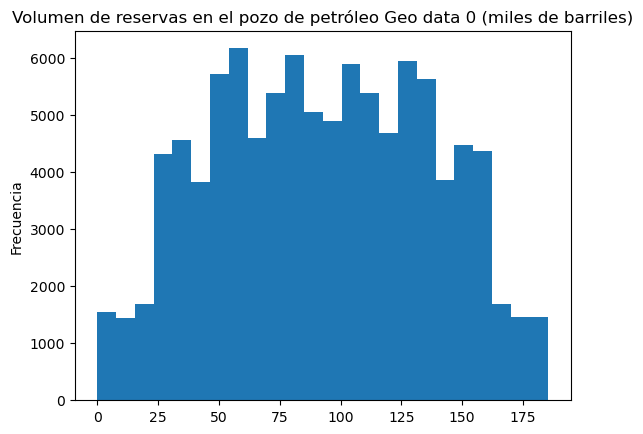

El volumen medio de reservas predicho para el Geo data 1 es: 68.72854689544599
RMSE del modelo de regresión lineal en el conjunto de validación de Geo data 1 es: 0.8930992867756169


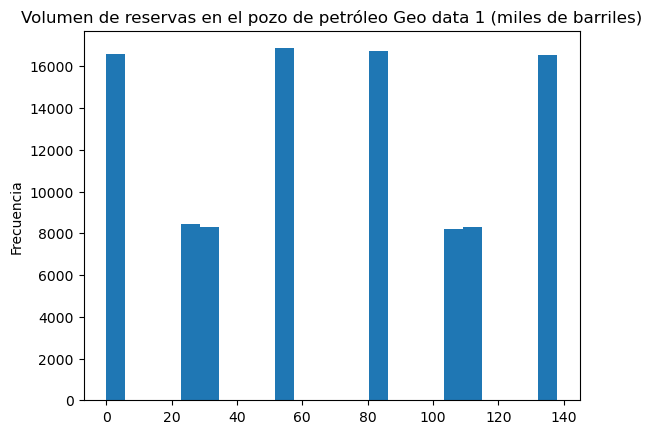

El volumen medio de reservas predicho para el Geo data 2 es: 94.96504596800489
RMSE del modelo de regresión lineal en el conjunto de validación de Geo data 2 es: 40.02970873393434


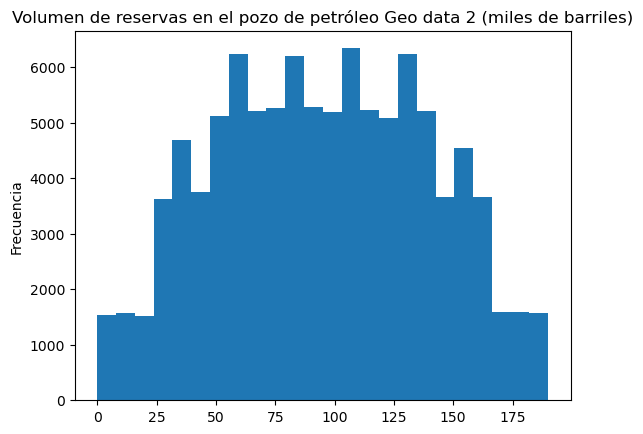

In [4]:
## imprimimo el volumen medio de reservas y el RMSE de cada conjunto de datos

modela_entrena_pozo(geo_data_0, "Geo data 0") # llamamos a la función para el primer conjunto de datos
modela_entrena_pozo(geo_data_1, "Geo data 1") # llamamos a la función para el segundo conjunto de datos
modela_entrena_pozo(geo_data_2, "Geo data 2") # llamamos a la función para el tercer conjunto de datos

## Comentarios iniciales

Con la media de 92.6 mil barriles y un RMSE de 37.57 mil barriles, tenemos un intervalo “de confianza intuitivo” de:
92.6±37.6 equivalente a [55,130] (miles de barriles).


Eso es un ±40% de la media. No es un error pequeño: así que las predicciones pueden estar muy por arriba o por abajo.


## Problemas detectados


En la región 1 observamos un problema de datos insuficientes; perse a tener la misma cantidad de registro en las tres regiones, el histograma de la región 1 nos muestra que tenemos valores aislados lo que indica una distribución irregular.

Con ello, RMSE artificialmente bajo, demasido bajo, casi perfecto, con lo que el modelo "memoriza" en lugar de generalizar.

Es por ello que el resultado del modelo no es confiable para predicciones reales.

## Datos más confiables y honestos 

En las regiones 0 y 2 tenemos datos más robustos; Valores centrados alrededor de la media (distribución más normal).

Un RMSE mayor pero más realista lo que refleja la variabilidad real de los datos.

Un Intervalo de confianza más amplio pero más honesto.

## Tabajemos en el modelo de negocio

Como la tarea es decir en qué región tendremos más potencial para los 200 nuevos pozos, necesitamos declara las varibles de interés del negocio.

In [5]:
# con base en los requerimientos, vamos a definir asl variables globales que usaremos

# -- parámetros del negocio

TOTAL_BUDGET = 100000000   # Presupuesto total 10 millones 
WELLS_TO_DEVELOP = 200     # Número de pozos a perforar 200
REVENUE_PER_KBARREL = 4500 # # Ingreso por 1000 barriles
PRICE_PER_BARREL = REVENUE_PER_KBARREL / 1000  # = 4.5 USD por barril

COST_PER_WELL = TOTAL_BUDGET / WELLS_TO_DEVELOP # Costo por pozo = 500,000 USD
THRESHOLD_KBARRELS = COST_PER_WELL / REVENUE_PER_KBARREL # Umbral mínimo de producción (en miles de barriles) para cubrir costes por pozo

THRESHOLD_BARRELS = THRESHOLD_KBARRELS * 1000     # Umbral mínimo de producción (en barriles) para cubrir costes por pozo

print(f"Precio por barril: {PRICE_PER_BARREL}")
print(f"Costo por pozo: {COST_PER_WELL}")
print(f"Umbral mínimo de producción (en miles de barriles) para cubrir costes por pozo.: {THRESHOLD_KBARRELS}")
print(f"Umbral por barril: {THRESHOLD_BARRELS}")

Precio por barril: 4.5
Costo por pozo: 500000.0
Umbral mínimo de producción (en miles de barriles) para cubrir costes por pozo.: 111.11111111111111
Umbral por barril: 111111.11111111111


## Creación de función para obtener los resulados generales 

Vamos a reutilizar la función de investigación para tener el modelo y sus predicciones y valores de validación para usar nuestras estimaciones y ganacias.

In [6]:

# Vamos a modificar nuestra función anterior para que nos retorn los reustlado del entrenamiento así como el modelo que usaremos
# en los cálculos posteriores
def modela_entrena_pozo(data, test_size=0.25, random_state=12345):
    """
    Entrena un modelo linea y devuelo : modelo, features_valid, target_valid y predictions_valid, y RMSE
    
    """

    features = data.drop(['id','product'], axis=1) # eliminamos las columnas id y product para quedarnos solo con las features
    target = data['product'] # esta es la variable objetivo que queremos predecir
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) # dividimos los datos en conjuntos de entrenamiento y validación

    # Vamos a usar la Regresión Linear para entrenar nuestro modelo

    model = LinearRegression( ) # Creamos el modelo de regresión lineal
    model.fit(features_train, target_train)  # Entrenamos el modelo
    predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación


    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5  # Calculamos el RMSE

    return model, features_valid, target_valid , predictions_valid,  rmse  # Retornamos el modelo y los datos de validación


In [7]:
def top_ganancias(target_valid , predictions_valid , top_n = WELLS_TO_DEVELOP,
                 revenue_per_kbarrel=REVENUE_PER_KBARREL, cost_per_well=COST_PER_WELL):
    """
    Selecciona los 'top_n' pozos por predicción (predictions_valid),
    pero calcula la ganancia con los valores REALES (target_valid) en esos pozos.
    Devuelve: profit_est  , selected_actual (Series con kbarrels reales de los top_n).
    """

    # Creamos el DataFram alineando los índices de 
    selecciones = pd.DataFrame({'target_valid' : target_valid,
                               'predictions_valid' : predictions_valid}).sort_values('predictions_valid', ascending = False)
    # Seleccionamos el top n
    top = selecciones.head(top_n) 

    # Los ingresos  = sum(kbarrels_reales) * revenue_per_kbarrel
    revenue = top['target_valid'].sum() * revenue_per_kbarrel # Calculamos los ingresos
    cost = top_n * cost_per_well   # Calculamos el coste
    profit = revenue - cost # Calculamos la ganancia
    return profit, top['target_valid'] # Retornamos la ganancia y los kbarrels reales

## Cálculo de ganacias de cada región

In [8]:

# con la función top_ganacias vamos a calcular las gancnais de cada región


results = []

for name, df in [('region_0', geo_data_0), ('region_1', geo_data_1), ('region_2', geo_data_2)]:
    
    modelo, features_valid, target_valid , predictions_valid,  rmse = modela_entrena_pozo(df)

    # Ganancia estimada con selección de top-N por predicción
    profit_est, selected_actual = top_ganancias(target_valid, predictions_valid)

    print(f"Ganancia estimada de la región {name} es: {profit_est}")
    


Ganancia estimada de la región region_0 es: 33208260.43139851
Ganancia estimada de la región region_1 es: 24150866.966815114
Ganancia estimada de la región region_2 es: 27103499.635998324


## Conclusiones


Comparación entre regiones:
Región 0: $33,208,260
- La más rentable
- Ganancia neta de ~33.2 millones

Región 2: $27,103,500 
- Segunda opción
- Ganancia neta de ~27.1 millones

Región 1: $24,150,867
- Menos rentable
- Ganancia neta de ~24.2 millones

Todas las regiones son rentables (ganancias positivas), pero:
Región 0 generaría ~ $ 9 millones más que Región 1
 
La diferencia entre la mejor y peor opción es significativa (~ $9M), sin embargo, aun tengamos en cuenta que la región 1 presenta poca fiabilidad dado sus datos.


## Usando bootstraping

Usando la predicción con regresión lineal tenemos una visión amplia de cada región y las ganancias que 
podemos tner en cada una de ella. Sin embargo, como se dijo desde el analisis inicial, la región 1 tenía muy poca variabildiad en los datos lo que no da ceterza con sus resultado.

Así que usaremos bootstraping con 1000 iteraciones (usando reemplazo en cada muestra) para calcular las ganancias y así vamos a estimar la distribución de la utilidad y medir el riesgo.



In [9]:

def bootstrap_profit(actual_kbarrels_selected, n_boot=1000,
                     revenue_per_kbarrel=REVENUE_PER_KBARREL, cost_per_well=COST_PER_WELL):
    """
    Bootstrap sobre los 'top_n' pozos seleccionados para estimar distribución de ganancias.
    Cada réplica re-muestrea con reemplazo los 'top_n' kbarrels REALES.
    Devuelve un diccionario con 
    mean (media)
    , ci_low (cuantil inferior) 
    , ci_high (cuantil superior)
    , p_loss (ganacia o pérdida)
    , profits (serie de ganacias).
    """
    k = len(actual_kbarrels_selected)  # Número de pozos seleccionados
    profits = []  # Lista para almacenar las ganancias de cada réplica
    for i in range(n_boot):
        # Vamos a re-muestrear con reemplazo, 1000 iteraciones en total y con esto estimaremos la distribución de ganancias
        # y evaluar el riesgo de pérdida asociado con la decisión de inversión.
        sample = actual_kbarrels_selected.sample(n=k, replace=True) # Re-muestreamos con reemplazo
        revenue = sample.sum() * revenue_per_kbarrel  # Calculamos los ingresos
        cost = k * cost_per_well  # Calculamos el coste
        profits.append(revenue - cost)  # Calculamos la ganancia
    profits = pd.Series(profits)  # Convertimos a Series de pandas
    return {
        'mean_profit': profits.mean(),
        'ci_low_95': profits.quantile(0.025),
        'ci_high_95': profits.quantile(0.975),
        'p_loss': (profits < 0).mean(),
        'profits': profits
    }

In [11]:
# con la función top_ganacias y junto a bootstrap vamos a calcular las ganacias estimadas

results = []

for name, df in [('region_0', geo_data_0), ('region_1', geo_data_1), ('region_2', geo_data_2)]:
    
    modelo, features_valid, target_valid , predictions_valid,  rmse = modela_entrena_pozo(df) 

    # Ganancia estimada con selección de top-N por predicción
    profit_est, selected_actual = top_ganancias(target_valid, predictions_valid) # Seleccionamos los pozos con mayor predicción

    # Bootstrap de riesgo/beneficio sobre los 'top-N' seleccionados
    boot = bootstrap_profit(selected_actual)  # Realizamos el bootstrap

    results.append({
        'Región': name,
        'RMSE': rmse,
        'Promedio predicciones top': (pd.DataFrame({'predictions_valid': predictions_valid})
                              .sort_values('predictions_valid', ascending=False)
                              .head(WELLS_TO_DEVELOP)['predictions_valid'].mean()),
        'Beneficio estimado puntual': profit_est,
        'Beneficio medio bootstrap': boot['mean_profit'],
        'IC 95% bajo': boot['ci_low_95'],
        'IC 95% alto': boot['ci_high_95'],
        'Prob. pérdida': boot['p_loss']
    })

region_summary = pd.DataFrame(results).sort_values('Beneficio medio bootstrap', ascending=False)  # Resumen por región
region_summary
    

,Región,RMSE,Promedio predicciones top,Beneficio estimado puntual,Beneficio medio bootstrap,IC 95% bajo,IC 95% alto,Prob. pérdida
0,region_0,37.579422,155.511654,3.320826e+07,3.329951e+07,2.998310e+07,3.618757e+07,0.0
2,region_2,40.029709,148.019493,2.710350e+07,2.710702e+07,2.358212e+07,3.045933e+07,0.0
1,region_1,0.893099,138.730134,2.415087e+07,2.415087e+07,2.415087e+07,2.415087e+07,0.0


## Análisis por región

--- 
Region_0

Beneficio esperado más alto: 33.36 millones.

Intervalo de confianza relativamente amplio (±3 M).

Riesgo de pérdida: 0 %.

RMSE alto (37.6), lo que indica mayor incertidumbre en las predicciones pero con datos más honestos.


---

Region_2

Beneficio medio: 27.09 millones, menor que región_0.

Intervalo más ajustado (±3 M).

Riesgo de pérdida: 0 %.

RMSE también alto (40.0), modelo menos preciso.


--- 
Region_1

Beneficio esperado más bajo (24.15 millones).

Intervalo nulo (todos los valores iguales, sin variabilidad en bootstrap) → indica que el modelo es extremadamente estable.

RMSE muy bajo (0.89) → predicciones casi perfectas.

Riesgo de pérdida: 0 %.

Región más segura y confiable, pero con menor margen de ganancia, pero con datos menos honestos, ya que como se vien en el análisis inicial, había mínima variabilidad en los datos los que provoca que los modelos no tenga que adivinar tanto,por eso las predicciones con casi perfectas.

## Conclusión

Tras el análisis comparativo de las tres regiones mediante modelos predictivos y simulaciones de riesgo (bootstrap con 1000 iteraciones), se determinaron los beneficios esperados y la probabilidad de pérdidas para la apertura de 200 nuevos pozos petrolíferos.

Región 0: beneficio promedio estimado de ≈33 millones USD, con un intervalo de confianza al 95% entre 30 y 36 millones USD y probabilidad de pérdida 0%.

Región 1: beneficio promedio de ≈24 millones USD, sin variabilidad en las simulaciones (intervalo estrecho), pero con un margen de ganancia menor frente a la Región 0.

Región 2: beneficio promedio de ≈27 millones USD, con mayor dispersión (IC 95% entre 23 y 30 millones USD), aunque igualmente sin riesgo de pérdidas.

## Recomendación
Se recomienda a OilyGiant desarrollar 200 pozos en la Región 0, ya que presenta el mayor beneficio esperado y nulo riesgo de pérdida, lo que la convierte en la alternativa más sólida desde el punto de vista financiero y estratégico.
